# EDA to explore data relationships

## Source Data:

https://www.ibm.com/communities/analytics/watson-analytics-blog/hr-employee-attrition/ 

SAMPLE DATA: HR Employee Attrition and Performance
avatar McKinley Stacker IV  Sep 14, 2015  91925
Watson Analytics Sample Data

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

## The goal of this exercise (10 minutes)

As a new data scientist in a R&D technology company, your executive analytics committee has tasked you to find the driving factors of attrition in the organization. You are planning on doing the following:

**Develop some initial theories on why some empoloyees Attrite and others do not. Write them down and share them once the exercise ends. Use the graphs that have been created for you below. YOU DO NOT HAVE TO DO ANY CODING.**

# Install packages

This may be necesarry to run the first time

In [4]:
!pip install pandas
!pip install pandas_profiling
!pip install seaborn
!pip install matplotlib
!pip install numpy

  Using cached https://files.pythonhosted.org/packages/06/ee/de89e0582276e3551df3110088bf20844de2b0e7df2748406876cc78e021/pluggy-0.12.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/76/bc/394ad449851729244a97857ee14d7cba61ddb268dce3db538ba2f2ba1f0f/py-1.8.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/52/90/6155aa926f43f2b2a22b01be7241be3bfd1ceaf7d0b3267213e8127d41f4/atomicwrites-1.3.0-py2.py3-none-any.whl
  Stored in directory: C:\Users\sshowalter\AppData\Local\pip\Cache\wheels\ce\c7\f1\dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Stored in directory: C:\Users\sshowalter\AppData\Local\pip\Cache\wheels\43\07\ac\7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Stored in directory: C:\Users\sshowalter\AppData\Local\pip\Cache\wheels\b0\b2\96\2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
Successfully built pandas-profiling htmlmin confuse


# Import the data

## Then show the shape and sample the first few rows

In [1]:
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
rawData = pd.read_csv("https://raw.githubusercontent.com/jswortz/UIC_Clustering_Code_2019/master/data/WA_Fn-UseC_-HR-Employee-Attrition.csv")


print("Data Shape: {} rows x {} cols".format(len(rawData), len(rawData.columns)))
rawData.head()

Data Shape: 1470 rows x 35 cols


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

# Inspect the data, perform Exploratory Data Analysis (EDA)


## Pandas .describe() is used to get basic statistics

In [2]:
rawData.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

# Pandas profiling provides a much more robust analysis with formatted HTML output

In [6]:
import pandas_profiling

pandas_profiling.ProfileReport(rawData)


# Distribution Analysis

didn't work for varaible: EmployeeCount, singular matrix


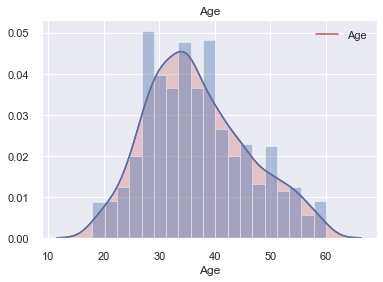

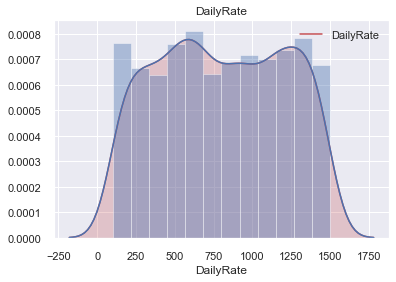

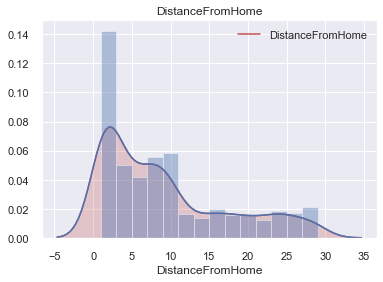

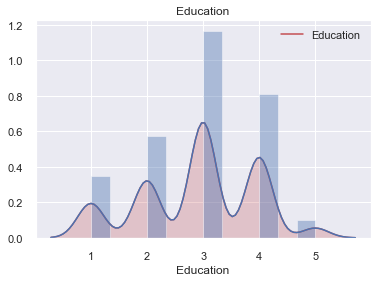

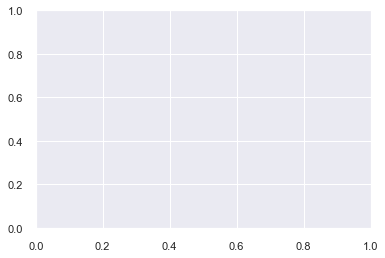

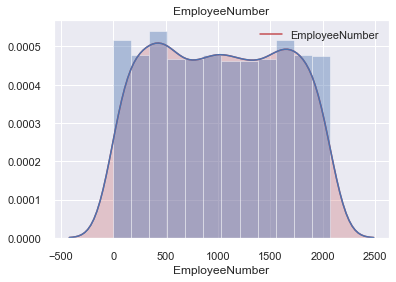

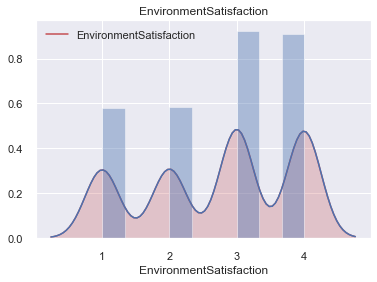

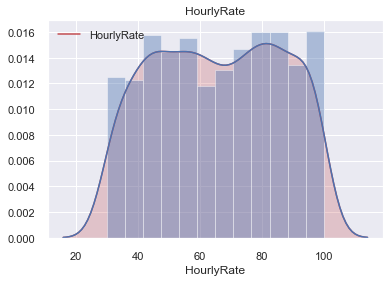

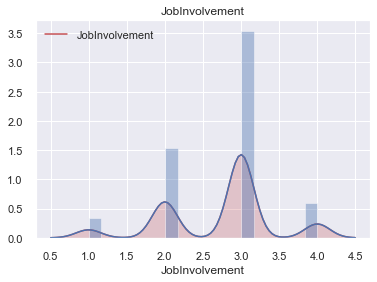

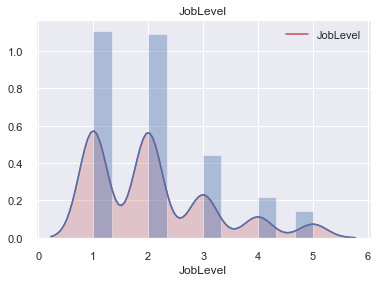

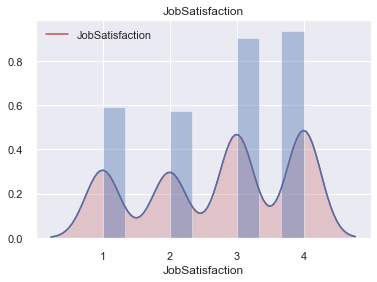

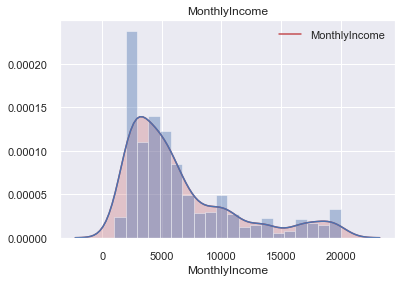

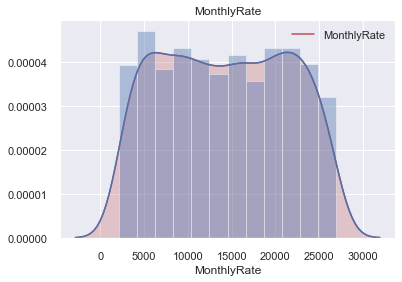

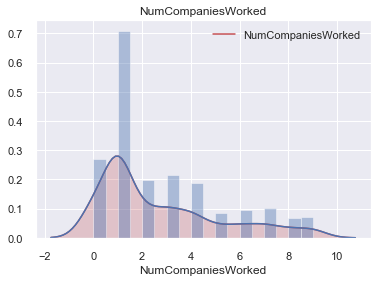

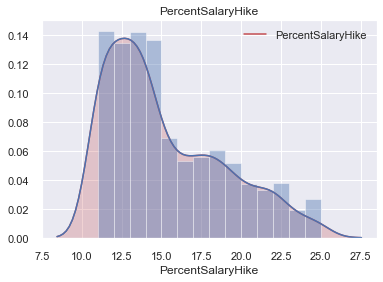

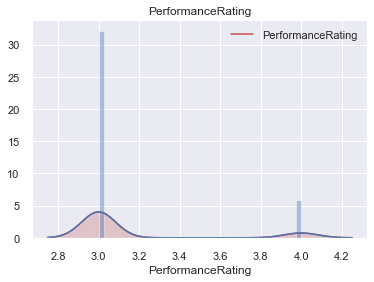

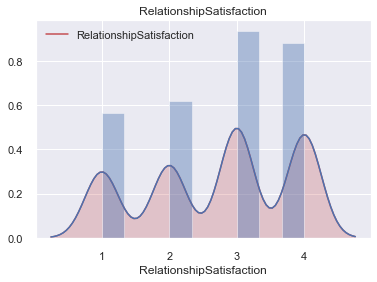

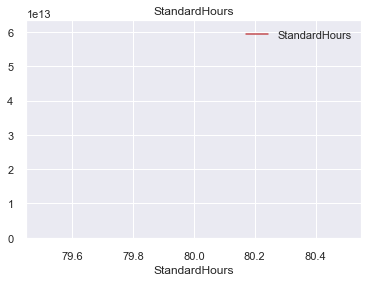

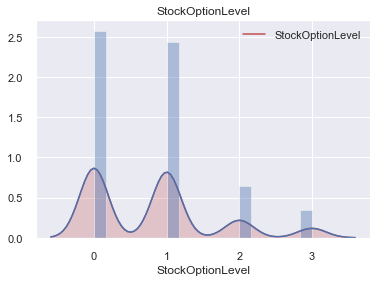

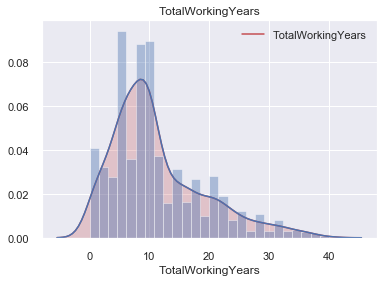

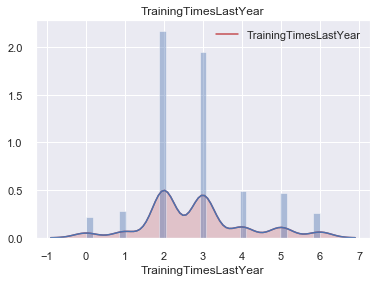

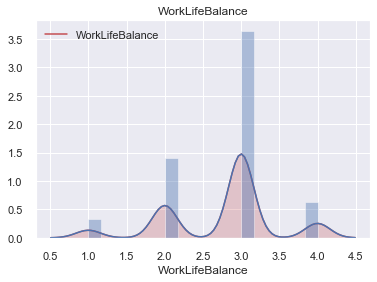

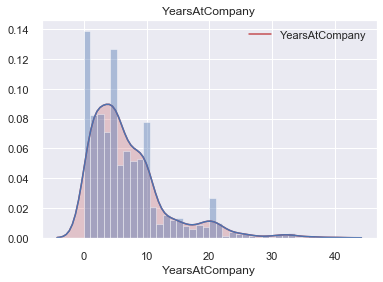

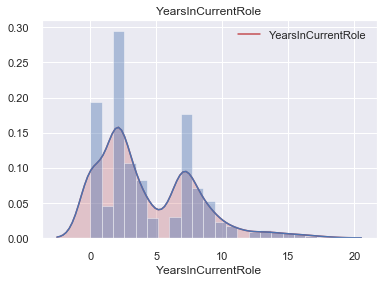

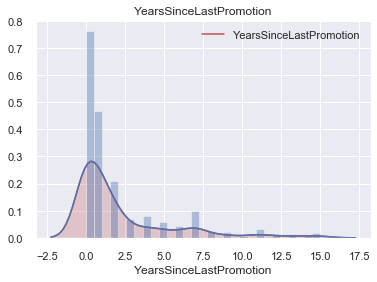

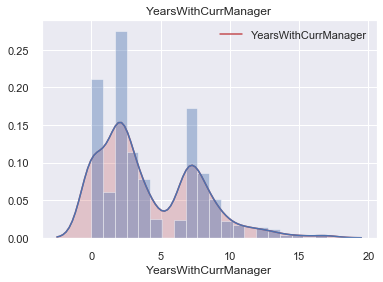

In [11]:
num_cols = rawData._get_numeric_data().columns
sns.set(rc={'figure.figsize':(11.7,8.27)})
%matplotlib inline
for col in num_cols:
    x = rawData[col]
    plt.figure(col)
    try:
        ax = sns.kdeplot(x, shade=True, color="r").set_title(col)
        ax = sns.distplot(x)
    except Exception as e:
        print("didn't work for varaible: {}, {}".format(col, e))

# Function for bar line plot

In [15]:
def dualAxisSort(data1, data2, ascending=False):
    ix = data1.sort_values(ascending=ascending).index
    data1 = data1.reindex(ix)
    data2 = data2.reindex(ix)
    return data1, data2

def barLinePlot(data, col, title):
    try:
        region_cnt = data.groupby(col)['Attrition'].count()
        region_avg = data.groupby(col)['Attrition'].mean()
        region_avg = region_avg.loc[list(region_cnt.index)]     
        region_cnt, region_avg = dualAxisSort(region_cnt, region_avg)

        ax = sns.barplot(x=region_avg.index, y=region_cnt, data=data, color = 'b')
        ax.set_xticklabels(rotation=90, labels = region_avg.index)
        ax2 = ax.twinx()
        ax2 = sns.lineplot(x=region_cnt.index, y = region_avg, data=data, color='r').set_title(title)
        plt.figure()
        
        
    except Exception as e:
        print(e, col)
        pass
    

# Distribution Bivariate Plots

singular matrix
EmployeeCount


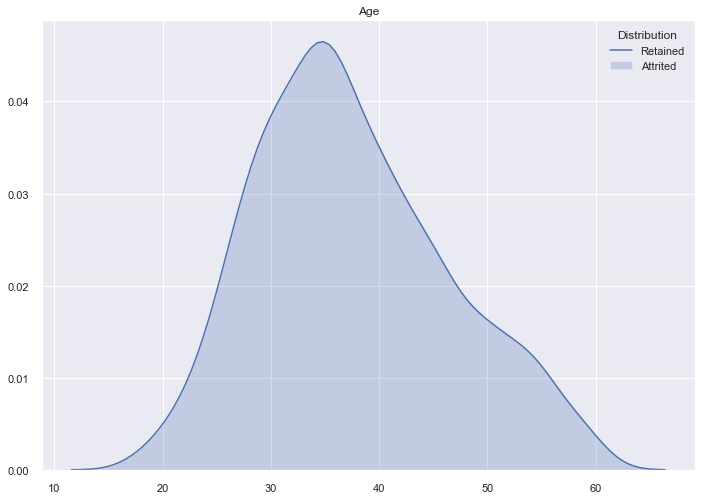

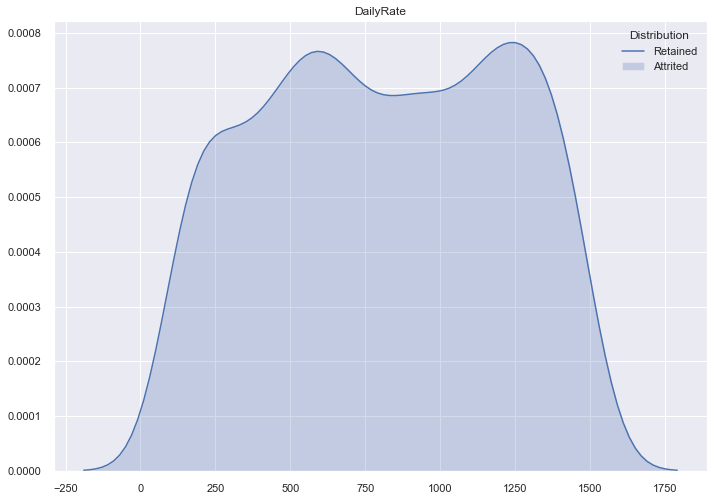

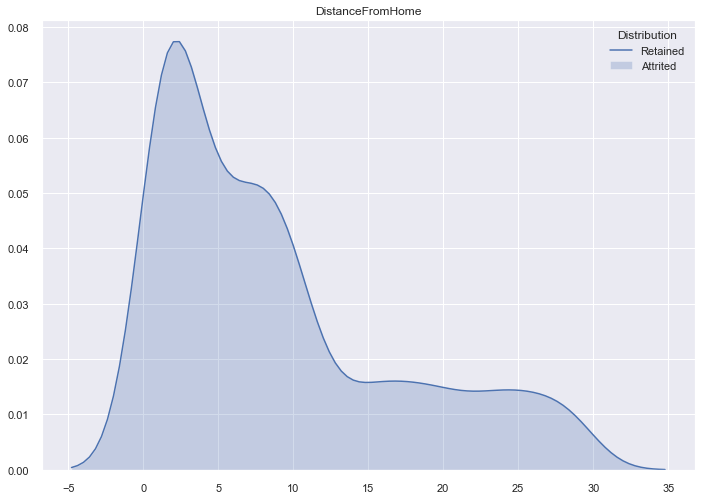

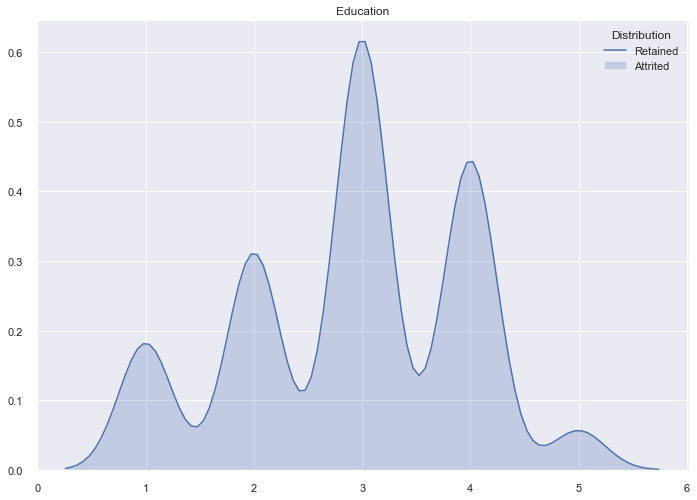

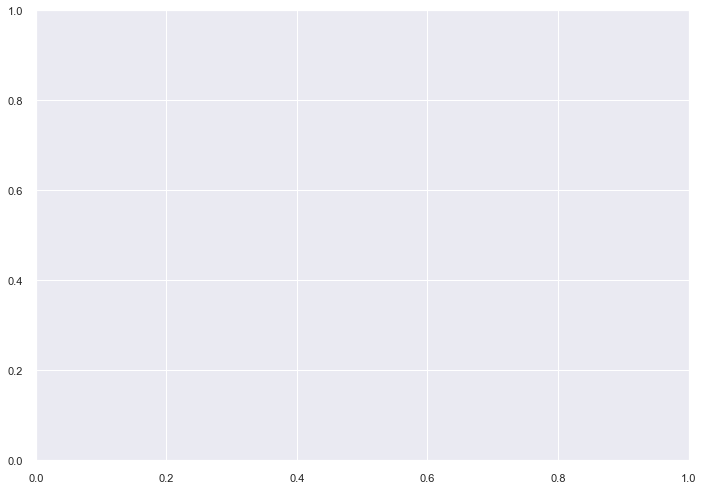

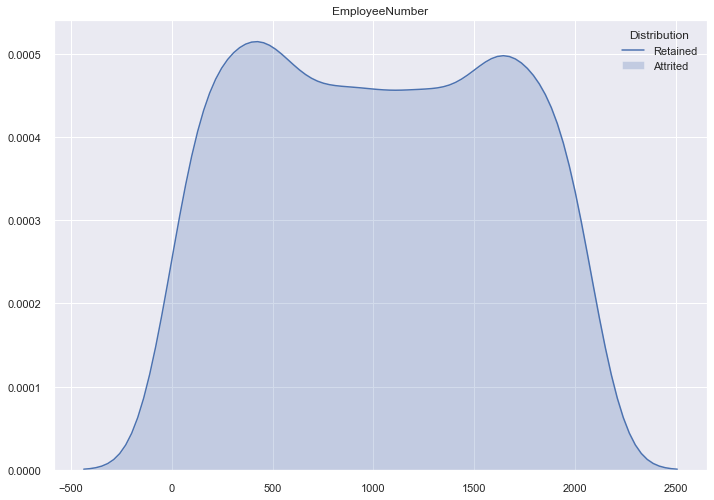

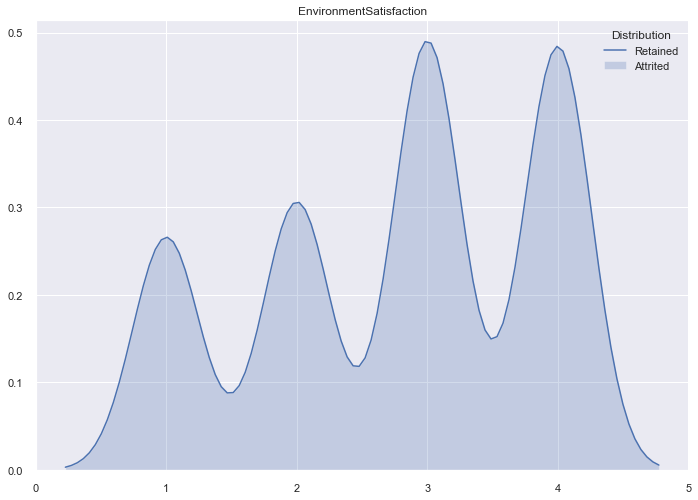

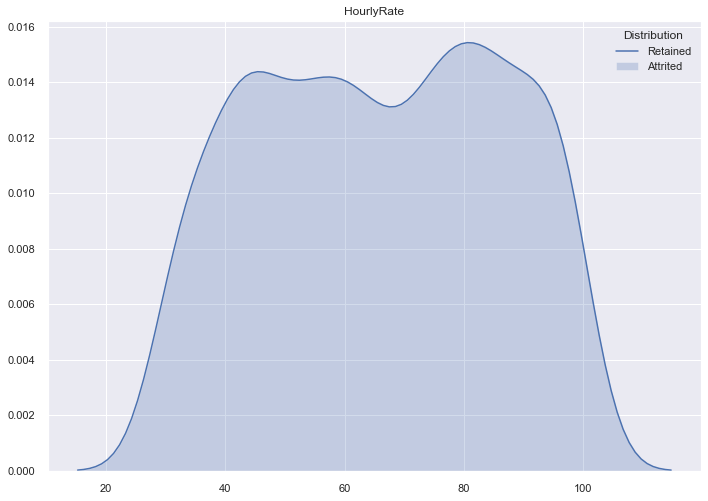

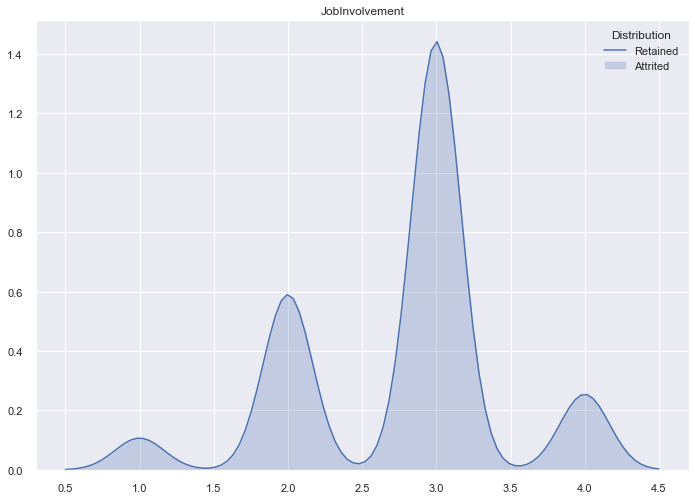

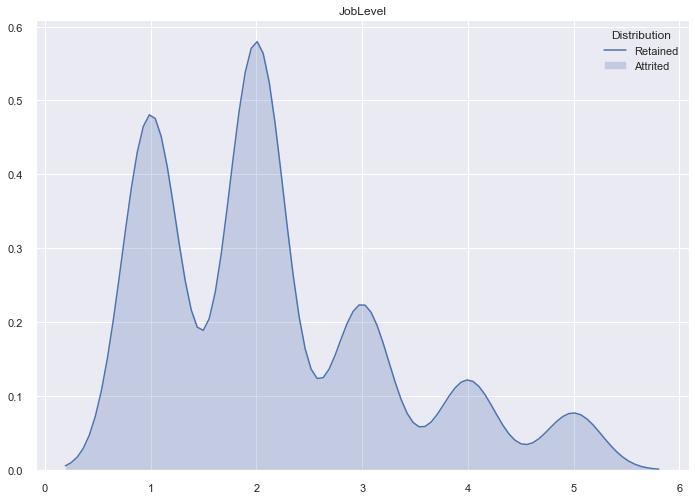

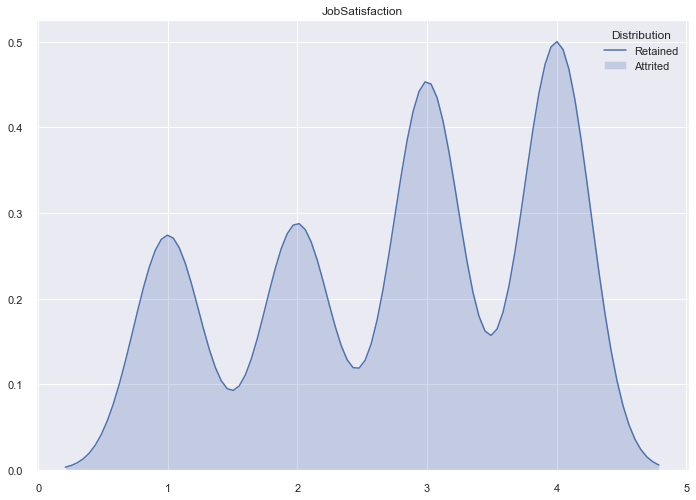

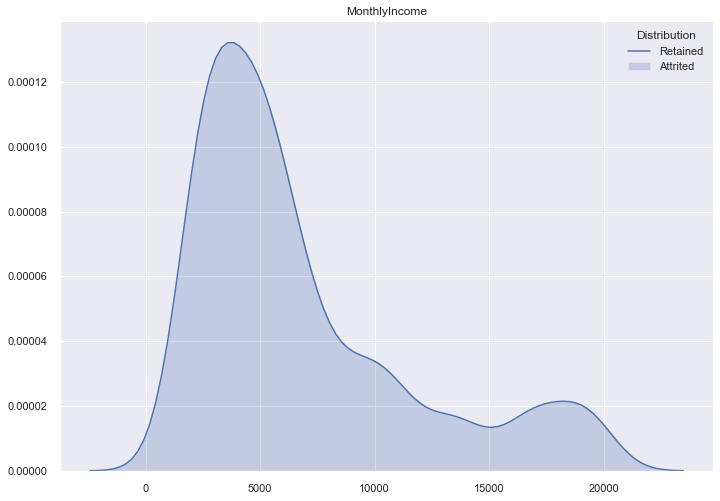

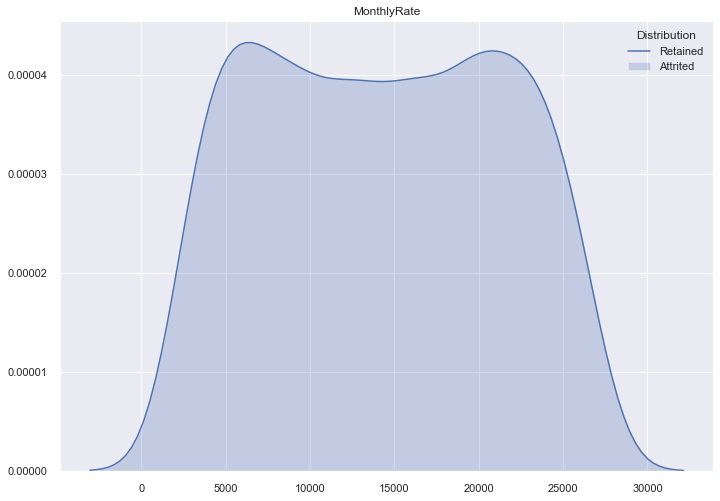

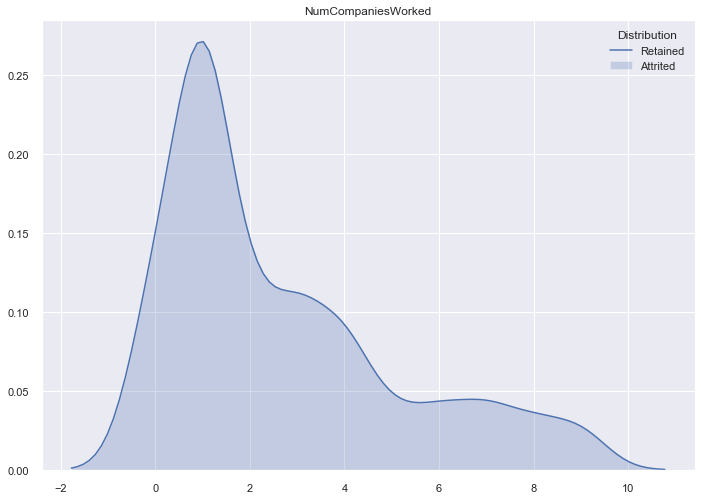

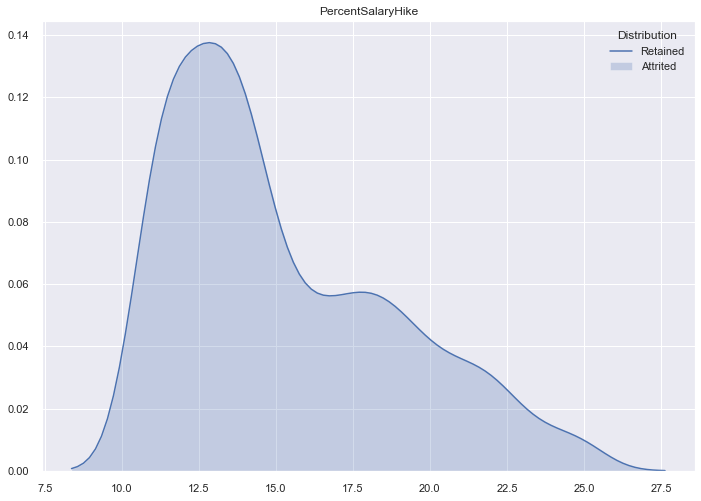

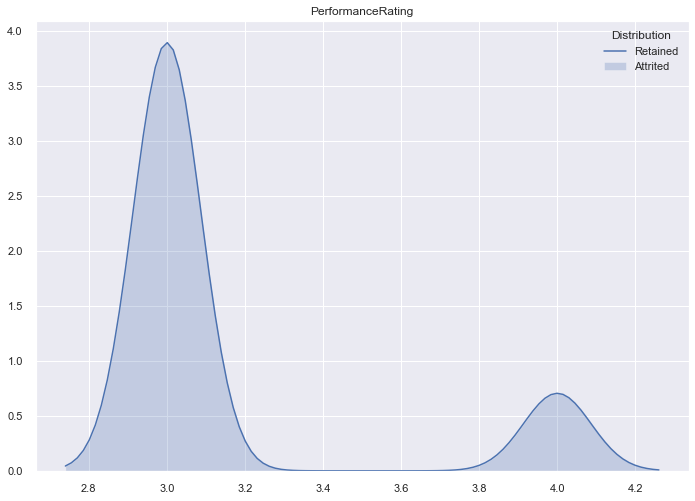

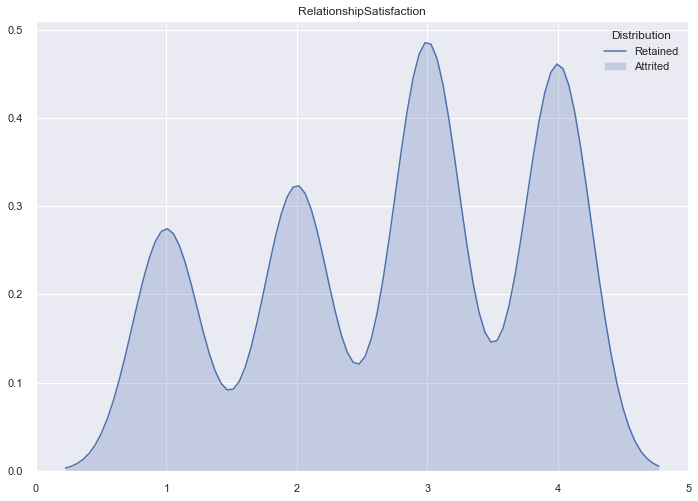

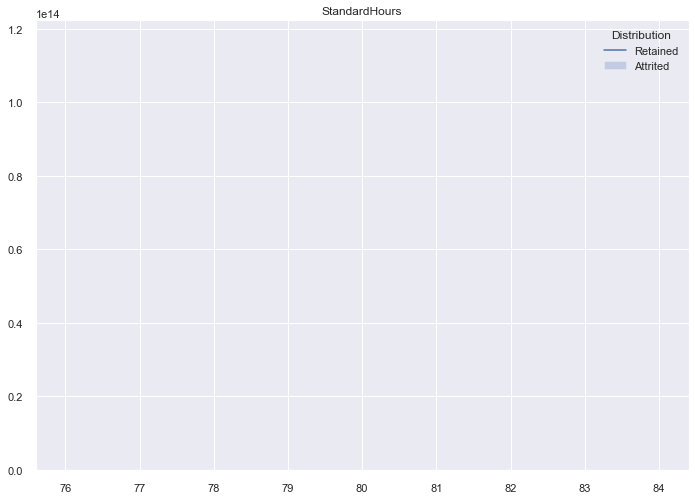

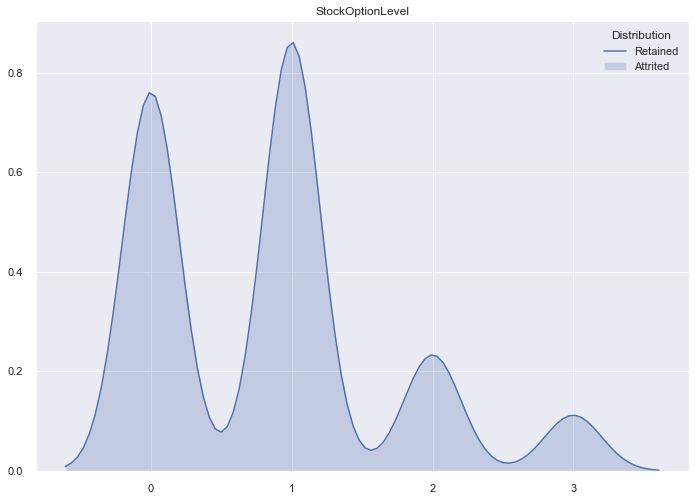

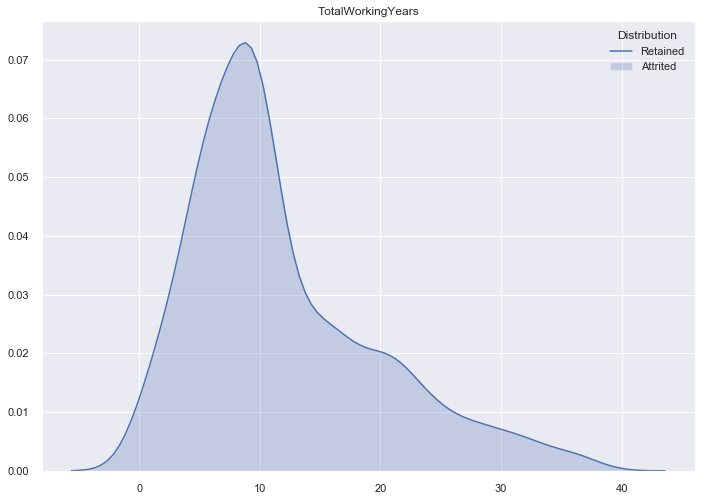

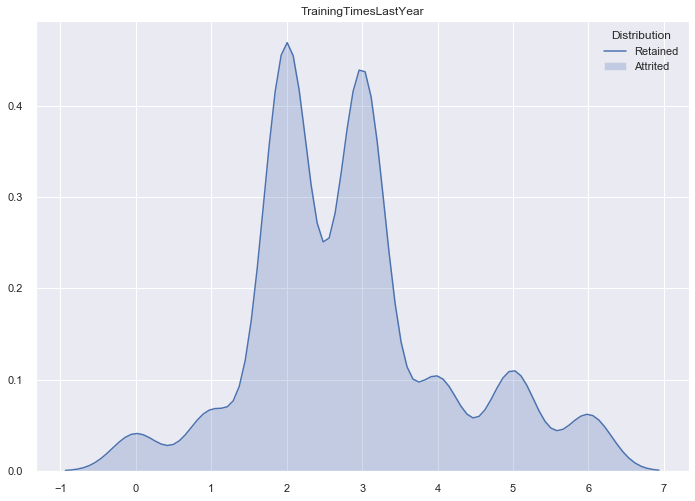

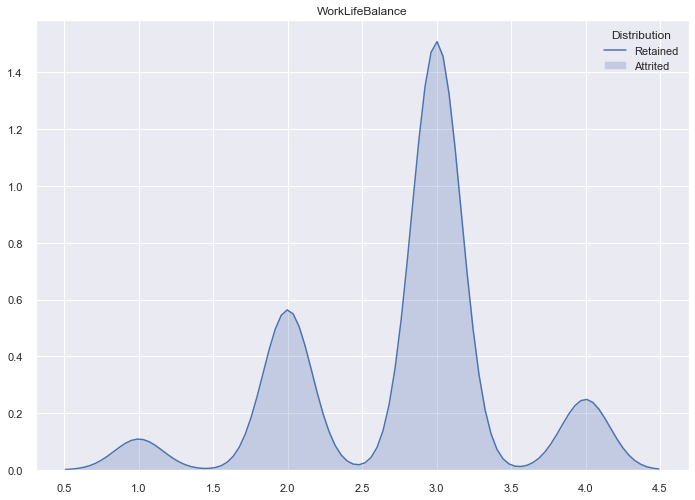

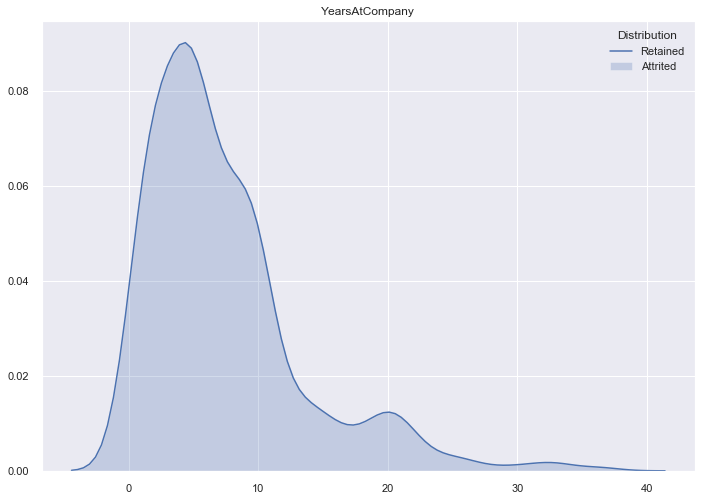

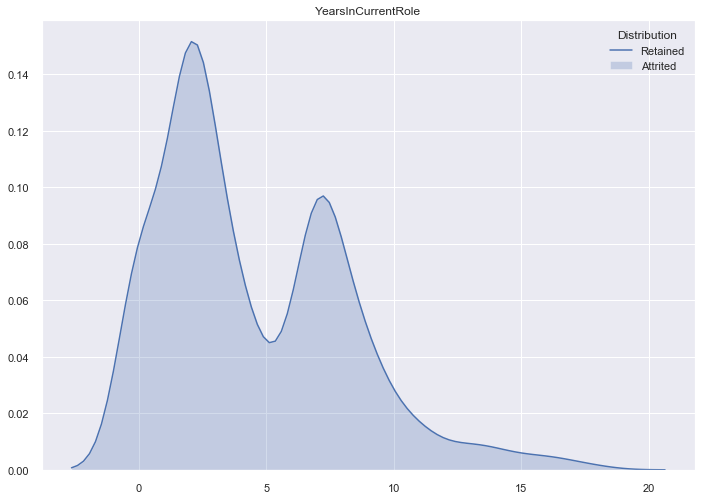

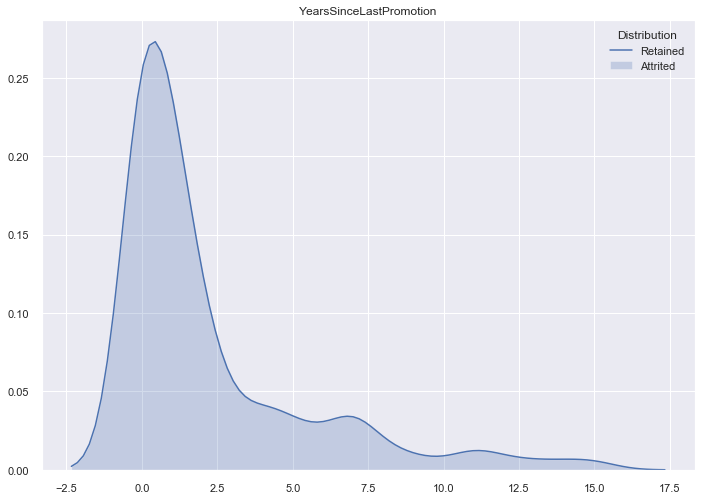

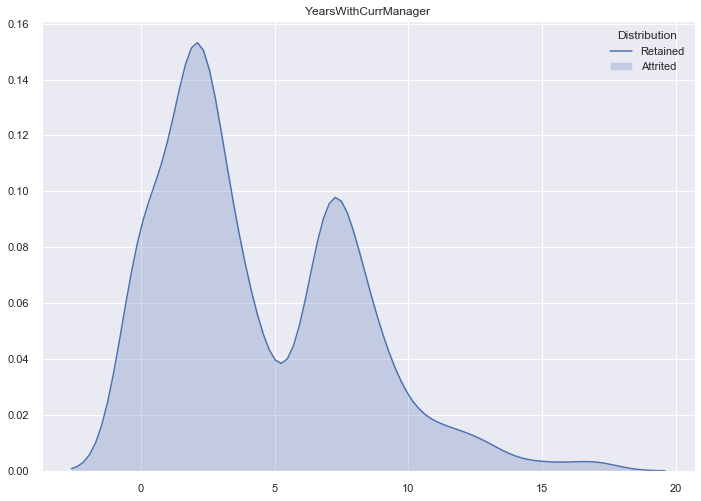

In [20]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
#NOTE THIS WORKS if TARGET IS 0 OR 1
d0 = rawData[rawData["Attrition"] == "No"]
d1 = rawData[rawData["Attrition"] == "YES"]

for col in num_cols:
    x0 = d0[col]
    x1 = d1[col]
    plt.figure()
    
    try:
        new_labels = ['Retained', 'Attrited']
        ax = sns.kdeplot(x0, shade=True, color="b", legend=True).set_title(col)
        
        ax = sns.kdeplot(x1, shade=True, color="r", legend=True)
        plt.legend(title='Distribution', loc='upper right', labels=new_labels)
    except Exception as e:
        print(e)
        print(col)
        pass